In [1]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def error_print(text):
    print("*"*50)
    print("ERROR:", text)
    print("*"*50)

In [3]:
class Analizer:
    def __init__(self, ruta='', sep=','):
        func_read = pd.read_csv if ruta.lower().endswith('.csv') else None
        if not func_read:
            error_print('archivo .csv no detectado')
            self.data = None
            return
            
        try:
            self.data = pd.read_csv(ruta, encoding= "ISO-8859-1", sep=sep)
        except:
            error_print('verifique ubicacion de archvio')
            self.data = None
            return

    def null_data(func):
        def proccess(self, *args, **kwargs):
            if self.data is None:
                error_print('data no extraida')
                return
            return func(self, *args, **kwargs)
        return proccess

    
    @null_data
    def null_verificator(self):        
        if self.data.isnull().any().any():
            view_info = pd.DataFrame(
                pd.concat(
                    [self.data.isnull().any(), 
                     self.data.isnull().sum(),
                     self.data.dtypes], 
                    axis=1)
            )
            view_info.columns = ['Nulos', 'Cantidad', 'Tipo Col']
            return view_info
        else:
            return "DATA LIMPIA DE NULOS"
    
    @null_data
    def percentil_verificator(self, cols=[]):
        if not isinstance(cols, list):
            print("'cols' debe contener una lista ")
            
        datus = self.data.copy()
        list_percentil = [0,1,3,5,10,20,30,50,60,70,80,90,95,97,99,100]
        for col in cols:
            plt.plot(
                list_percentil,
                np.nanpercentile(datus[col], list_percentil),
                label=col
            )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        df_datus = pd.concat(
            [ 
                pd.Series(np.nanpercentile(datus[col], list_percentil),
                          index=list_percentil) 
                for col in cols
            ],
            axis=1
        )
        df_datus.columns = cols
        return df_datus.T
    
    @null_data
    def set_col_percentil(self, cols=[], percentil=95, tipo='mayor'):
        if tipo not in ['mayor', 'menor']:
            print("Tipo no valido")
            return
        if not (isinstance(percentil, int) and percentil in range(0,100)):
            print("Percentil invalido")
            return
        if not isinstance(cols, list):
            print("'cols' debe contener una lista ")
        
        for col in cols:
            percent_val = np.nanpercentile(self.data[col], [percentil])[0]
            if tipo == 'mayor':
                condition_data = self.data[col] > percent_val
            elif tipo == 'menor':
                condition_data = self.data[col] < percent_val
            
            self.data.loc[condition_data, col] = percent_val
            
        return(self.data.head(10))
    
    @null_data
    def add_col_dates(self, col, format_match="%d-%b-%y", month=True, day=True, 
                      weekday=True, replace_str=False, format_str_replace='%Y/%m/%d'):
        
        self.data['date'] = pd.to_datetime(self.data[col], format=format_match)
        self.data = self.data.drop([col], axis=1)
        
        if month:
            self.data['moth'] = self.data['date'].dt.strftime('%b')
        if day:
            self.data['day'] = self.data['date'].dt.strftime('%d')
        if weekday:
            self.data['weekday'] = self.data['date'].dt.strftime('%A')
        if replace_str:
            self.data['date'] = self.data['date'].dt.strftime(format_str_replace)
            
        return(self.data.head(10))
            

        

In [13]:
train_analisis = Analizer("data/Train.csv")

In [14]:
train_analisis.null_verificator()

,Nulos,Cantidad,Tipo Col
Patient_ID,False,0,int64
Health_Camp_ID,False,0,int64
Registration_Date,True,323,object
Var1,False,0,int64
Var2,False,0,int64
Var3,False,0,int64
Var4,False,0,int64
Var5,False,0,int64


In [15]:
train_analisis.data.shape

(58532, 8)

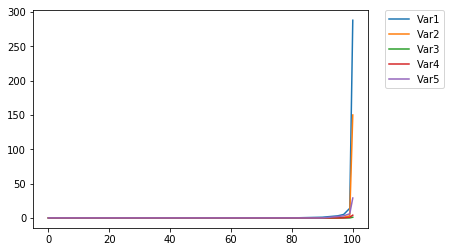

,0,1,3,5,10,20,30,50,60,70,80,90,95,97,99,100
Var1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,14.0,288.0
Var2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,150.0
Var3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Var4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
Var5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,6.0,29.0


In [16]:
train_analisis.percentil_verificator(['Var1','Var2','Var3','Var4','Var5'])

In [17]:
train_analisis.set_col_percentil(['Var1','Var2','Var3','Var4','Var5'], percentil=93)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,2.0,0.0,0.0,0.0,1.0
1,507246,6578,18-Aug-05,2.0,0.0,0.0,0.0,1.0
2,524931,6535,07-Feb-04,0.0,0.0,0.0,0.0,0.0
3,494493,6570,20-May-05,0.0,0.0,0.0,0.0,0.0
4,523001,6562,22-May-05,0.0,0.0,0.0,0.0,0.0
5,500733,6535,31-Jan-04,0.0,0.0,0.0,0.0,0.0
6,501155,6538,31-Jan-04,0.0,0.0,0.0,0.0,0.0
7,501457,6538,12-Aug-04,0.0,0.0,0.0,0.0,0.0
8,505849,6527,19-Jun-05,0.0,0.0,0.0,0.0,0.0
9,517088,6585,31-Oct-03,2.0,0.0,0.0,0.0,1.0


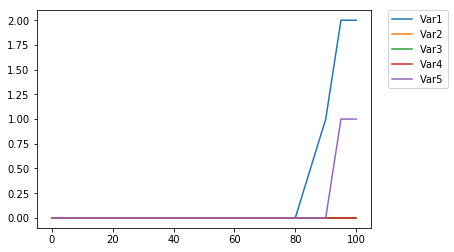

,0,1,3,5,10,20,30,50,60,70,80,90,95,97,99,100
Var1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
Var2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Var3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Var4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Var5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [18]:
train_analisis.percentil_verificator(['Var1','Var2','Var3','Var4','Var5'])

In [19]:
train_analisis.data['var'] = (train_analisis.data['Var1'] + train_analisis.data['Var5']) / 2

In [20]:
train_analisis.data = train_analisis.data.drop(['Var1', 'Var2', 'Var3', 'Var4', 'Var5'], axis=1)
train_analisis.data.head(15)

,Patient_ID,Health_Camp_ID,Registration_Date,var
0,489652,6578,10-Sep-05,1.5
1,507246,6578,18-Aug-05,1.5
2,524931,6535,07-Feb-04,0.0
3,494493,6570,20-May-05,0.0
4,523001,6562,22-May-05,0.0
5,500733,6535,31-Jan-04,0.0
6,501155,6538,31-Jan-04,0.0
7,501457,6538,12-Aug-04,0.0
8,505849,6527,19-Jun-05,0.0
9,517088,6585,31-Oct-03,1.5


In [21]:
train_analisis.add_col_dates('Registration_Date')

,Patient_ID,Health_Camp_ID,var,date,moth,day,weekday
0,489652,6578,1.5,2005-09-10,Sep,10,Saturday
1,507246,6578,1.5,2005-08-18,Aug,18,Thursday
2,524931,6535,0.0,2004-02-07,Feb,07,Saturday
3,494493,6570,0.0,2005-05-20,May,20,Friday
4,523001,6562,0.0,2005-05-22,May,22,Sunday
5,500733,6535,0.0,2004-01-31,Jan,31,Saturday
6,501155,6538,0.0,2004-01-31,Jan,31,Saturday
7,501457,6538,0.0,2004-08-12,Aug,12,Thursday
8,505849,6527,0.0,2005-06-19,Jun,19,Sunday
9,517088,6585,1.5,2003-10-31,Oct,31,Friday
